##### Задания не несут смысловой нагрузки для реальной жизни, они сделаны лишь для того, чтоб научить использовать Pandas

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

https://www.kaggle.com/ronitf/heart-disease-uci

___

In [1]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("heart_pandas.csv")
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,upsloping,0,reversable defect,0
299,45,male,non-anginal pain,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,upsloping,0,reversable defect,0
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,upsloping,2,reversable defect,0
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,upsloping,1,reversable defect,0


#### Описание признаков

**age**: The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

___

#### Сколько мужчин в датасете? Сколько женщен? (sex)

In [24]:
data.sex.value_counts().female

96

#### Какой процент мужчин в датасете? (решите в одну строчку, не используя предыдущий результат. Не забудте знак процента) 

In [25]:
f'{data.sex.value_counts(normalize=True).male*100}%'

'68.31683168316832%'

#### Сколько мужчин имеют заболевание сердца? Сколько женщин имеют заболевание сердца?

In [50]:
s_t = data[["sex","target"]]
f'Мужчин с заболеванием сердца: {int(s_t[s_t["target"]==1].value_counts().male)}, женщин: {int(s_t[s_t["target"]==1].value_counts().female)}'


'Мужчин с заболеванием сердца: 93, женщин: 72'

**Какую долю, от общего числа пациентов, занимают мужчины не имеющие болезнь сердца?**

In [116]:
healthy_men = 1-data[data.sex=='male'].target.mean()
# s_t[s_t["sex"]=='male'].mean()
f'Здоровых мужчин {healthy_men} доля от всех мужчин'

'Здоровых мужчин 0.5507246376811594 доля от всех мужчин'

In [165]:
hm = sum(data[data.sex=='male'].target==0)
f'Доля мужчин без заболевания сердца от всех пациентов {hm/len(data)}'

'Доля мужчин без заболевания сердца от всех пациентов 0.37623762376237624'

**Сколько лет самому молодому пациенту, страдающему болезнью сердца?**

In [175]:
data[data.target==1].age.min()

29

**Сколько лет самому возастному пациенту, у которого нет проблем с сердцем?**

In [176]:
data[data.target==0].age.max()

77

**Сколько лет самой молодой женщине, которая страдает болезнью сердца?**

In [449]:
d3 = data[data['target']==1]
d3[d3['sex']=='female'].age.min()


34

**Какой средний возраст женщин?**

In [178]:
data[data.sex=='female'].age.mean()

55.677083333333336

**Каковы средние значения и среднеквадратичные отклонения возраста тех, кто страдают болезнью сердца?**

In [197]:
data[data.target==1].age.describe()[1:3]

mean    52.496970
std      9.550651
Name: age, dtype: float64

#### Правда ли, что люди не болеющие болезнью сердца имеют уровня холестерина меньше среднего? (chol) 

In [214]:
#Находим среднее значение уровня холестерина
mean_cholesterol = data["cholesterol"].mean()
#Сортируем на только здоровых людей и среди них сравниваем уровень холестерина со средним, и записываем в Series
tf = data[data.target==0].cholesterol<=mean_cholesterol
#Получаем самый часторезультирующий вариант, который и принимем за ответ
tf.describe().top

False

**Выведите статистику rest_ecg для все числовых признаков, его максимально и среднее значение (используйте groupby(), решите в одну строчку)**

In [451]:
numbers = [i for i in data.columns if data[i].dtype!=object]
numbers

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'target']

In [452]:
pd.concat([data.groupby("rest_ecg")[numbers].max(), data.groupby("rest_ecg")[numbers].mean()], axis =1)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
rest_ecg,,,,,,,,,,,,,,
ST-T wave abnormality,71,180,354,194,5.6,4,1,52.914474,129.065789,237.269737,151.960526,0.879605,0.638158,0.631579
left ventricular hypertrophy,76,180,327,140,4.4,3,1,61.000000,140.500000,261.750000,125.750000,2.725000,1.000000,0.250000
normal,77,200,564,202,6.2,4,1,55.687075,134.027211,255.142857,147.904762,1.159184,0.816327,0.462585


**Посчитайте у кого уровень депрессии при физический нагрузке выше (в среднем), среди мужчин страдающих болезнью сердца или среди женщин не страдающих болезнью сердца (st_depression)**

In [535]:
import seaborn as sns
plt.style.use('fivethirtyeight')

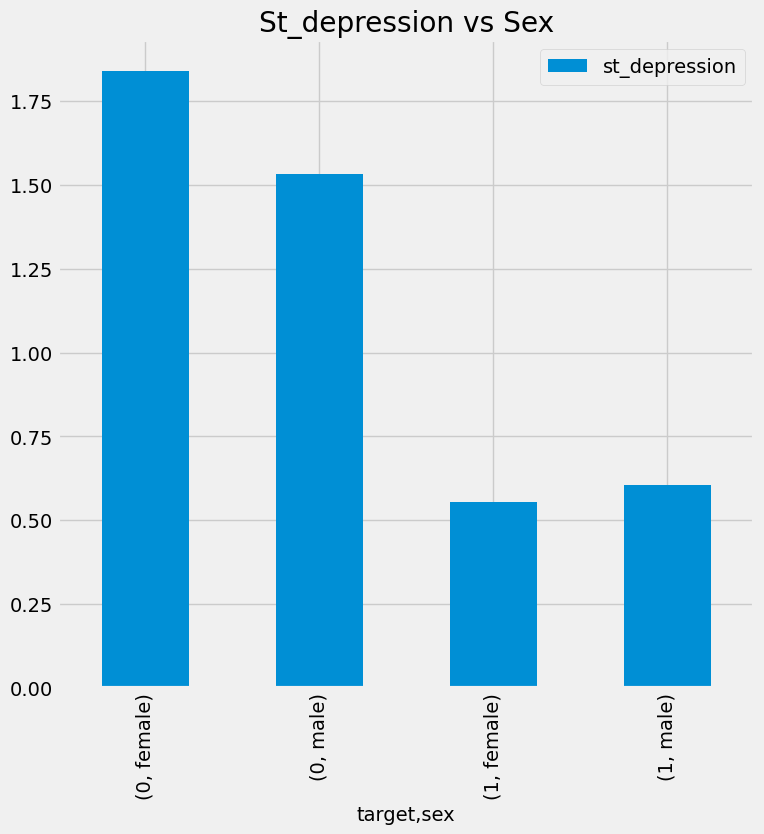

In [536]:

f,ax=plt.subplots(1, 1, figsize=(8,8))
data[['target','st_depression', 'sex']].groupby(['target', 'sex']).mean().plot.bar(ax=ax)
ax.set_title('St_depression vs Sex')

plt.show()

*Очевидно, что уровень депрессии при физический нагрузке выше у женщин не страдающих болезнью сердца*

**Посчтитайте максимальный и минимальный уровень холестерина для каждого типа chest_pain_type, rest_ecg, thalassemia. Пишите код оптимально, можно использовать циклы**

In [522]:
col = ['chest_pain_type', 'rest_ecg', 'thalassemia']
for i in col:
    print(data[[i,'cholesterol']].groupby([i]).min())
    print(data[[i,'cholesterol']].groupby([i]).max())


                  cholesterol
chest_pain_type              
atypical angina           126
non-anginal pain          182
typical angina            131
                  cholesterol
chest_pain_type              
atypical angina           564
non-anginal pain          298
typical angina            409
                              cholesterol
rest_ecg                                 
ST-T wave abnormality                 126
left ventricular hypertrophy          197
normal                                149
                              cholesterol
rest_ecg                                 
ST-T wave abnormality                 354
left ventricular hypertrophy          327
normal                                564
                   cholesterol
thalassemia                   
fixed defect               141
normal                     169
reversable defect          126
                   cholesterol
thalassemia                   
fixed defect               417
normal                     318
r

**Сколько значений может принимать каждый из категориальных признаков?**

In [523]:
names = [i for i in data.columns if data[i].dtype==object]

data[names].describe().loc[['unique']]

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
unique,2,3,2,3,2,2,3


**У какого категориального признака наблюдается самый сильный дизбаланс классов?**

In [562]:

disbalans = {}
for i in names:
    max_i = data[i].value_counts(normalize=True).max()
    min_i = data[i].value_counts(normalize=True).min()
    disbalans[i] = max_i/min_i
max(disbalans, key = disbalans.get)


'rest_ecg'

Если я правильно поняла, дисбаланс классов для данной задачи - это отношение количества максимально употребляемого признака к минимально употребляемому. И чем больше это отношение - тем больше дизбаланс.